Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import qtb_plot

Could not load modelbase.assimulate. Sundials support disabled.


In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [4]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


#### finden der lambdaposition

In [5]:
m.cpdIdDict

{'si': 0,
 'a': 1,
 'mr': 2,
 'mt': 3,
 'mm': 4,
 'mq': 5,
 'cr': 6,
 'ct': 7,
 'cm': 8,
 'cq': 9,
 'pr': 10,
 'pt': 11,
 'pm': 12,
 'pq': 13,
 'gamma': 14,
 'Iq': 15,
 'lambda': 16}

#### plotten von lambda

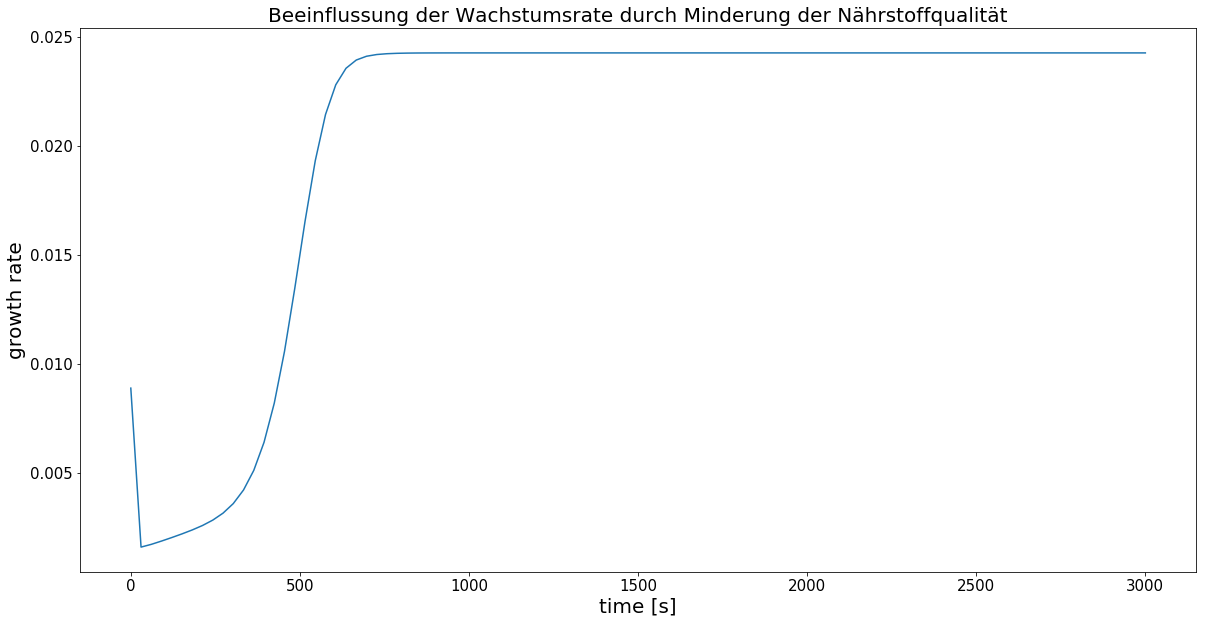

In [6]:
# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#for i, data in enumerate(s.getT()):
plt.plot(s.getT(),s.getY()[:,16], label = 'pr') #valuesOneHundredTimeSteps[i][:,10]
#plt.legend(loc = 'lower right',prop = {'size': 20})

In [8]:
s.getY()[:,16][-1]

0.02426281278190851

In [14]:
sneu.getY()[:,16][-1]

0.04006738225636636

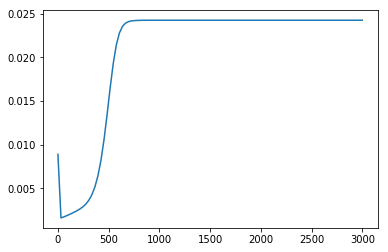

In [10]:
plt.plot(s.getT(),s.getY()[:,16])

In [7]:
def Opt(p0):
    
    m = WeisseBaseModel()
    s = modelbase.Simulator(m)
    m.par.dm, m.par.Kgamma, m.par.vt,m.par.Kt, m.par.vm, m.par.Km, m.par.hq, m.par.kb, m.par.ku=p0
   
    #                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    s.timeCourse(np.linspace(0,3000,100),weise_values);
    lambdanach = s.getY()[:,16][-1]
    lamda = 100 - lambdanach
    print(lamda)
    
    return (lamda)
 




In [8]:
#weise parameter
init_guess = [0.1,7,726,
              1000,5800,1000,
              4,1,1]
#nach 1.fit:
#init_guess = [1.00000000e-02, 1.00000000e+00, 1.00000000e+03, 
#              9.80109874e+02, 5.80000000e+03, 1.00000000e+03,
#              1.00000000e+01, 1.00000000e+01, 1.00000000e-02]


              
bounds = ((0.01,10),(1,100),(100,1000),
          (10,10000),(100,10000),(10,10000),
          (1,10),(0.01,10),(0.01,10))

In [9]:
fit = spo.minimize(Opt, init_guess, bounds = bounds)

99.97573718721809
99.97573718722589
99.9757371872234


KeyboardInterrupt: 

In [16]:
fit

      fun: 99.9599326177436
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.95283847e-05,  4.81747975e-04, -1.56319402e-05,  1.42108547e-06,
        0.00000000e+00,  0.00000000e+00, -9.09494702e-05,  0.00000000e+00,
        1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 270
      nit: 11
   status: 0
  success: True
        x: array([1.00000000e-02, 1.00000000e+00, 1.00000000e+03, 9.80109874e+02,
       5.80000000e+03, 1.00000000e+03, 1.00000000e+01, 1.00000000e+01,
       1.00000000e-02])

In [15]:
#0.7462624134601226

'''
 fun: 6.448243088048207
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.13686838e-04,  0.00000000e+00, -8.52651283e-06,  3.59356989e-04,
       -4.26325641e-06,  4.26325641e-05, -4.17443857e-06,  1.06581410e-06,
        3.55271368e-07, -4.26085833e-03, -4.25899316e-03,  0.00000000e+00,
        0.00000000e+00, -3.73034936e-06, -2.84217094e-06,  8.88178420e-07,
       -7.10542736e-07,  1.80122584e-04,  1.80122584e-04,  0.00000000e+00])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2499
      nit: 43
   status: 0
  success: True
        x: array([1.00000000e-02, 5.00000000e-01, 1.00000000e+05, 1.00000000e-01,
       1.00000000e+05, 1.00000000e-02, 1.00000000e+05, 9.99954135e+02,
       7.27494320e+03, 1.00000000e+02, 1.00000000e+02, 1.00000000e+04,
       1.00000051e+04, 1.00000000e+01, 1.00000000e+02, 1.00000000e-02,
       4.86491865e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+01])
       
'''

"\n fun: 6.448243088048207\n hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>\n      jac: array([ 1.13686838e-04,  0.00000000e+00, -8.52651283e-06,  3.59356989e-04,\n       -4.26325641e-06,  4.26325641e-05, -4.17443857e-06,  1.06581410e-06,\n        3.55271368e-07, -4.26085833e-03, -4.25899316e-03,  0.00000000e+00,\n        0.00000000e+00, -3.73034936e-06, -2.84217094e-06,  8.88178420e-07,\n       -7.10542736e-07,  1.80122584e-04,  1.80122584e-04,  0.00000000e+00])\n  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'\n     nfev: 2499\n      nit: 43\n   status: 0\n  success: True\n        x: array([1.00000000e-02, 5.00000000e-01, 1.00000000e+05, 1.00000000e-01,\n       1.00000000e+05, 1.00000000e-02, 1.00000000e+05, 9.99954135e+02,\n       7.27494320e+03, 1.00000000e+02, 1.00000000e+02, 1.00000000e+04,\n       1.00000051e+04, 1.00000000e+01, 1.00000000e+02, 1.00000000e-02,\n       4.86491865e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+01])\n       \n"

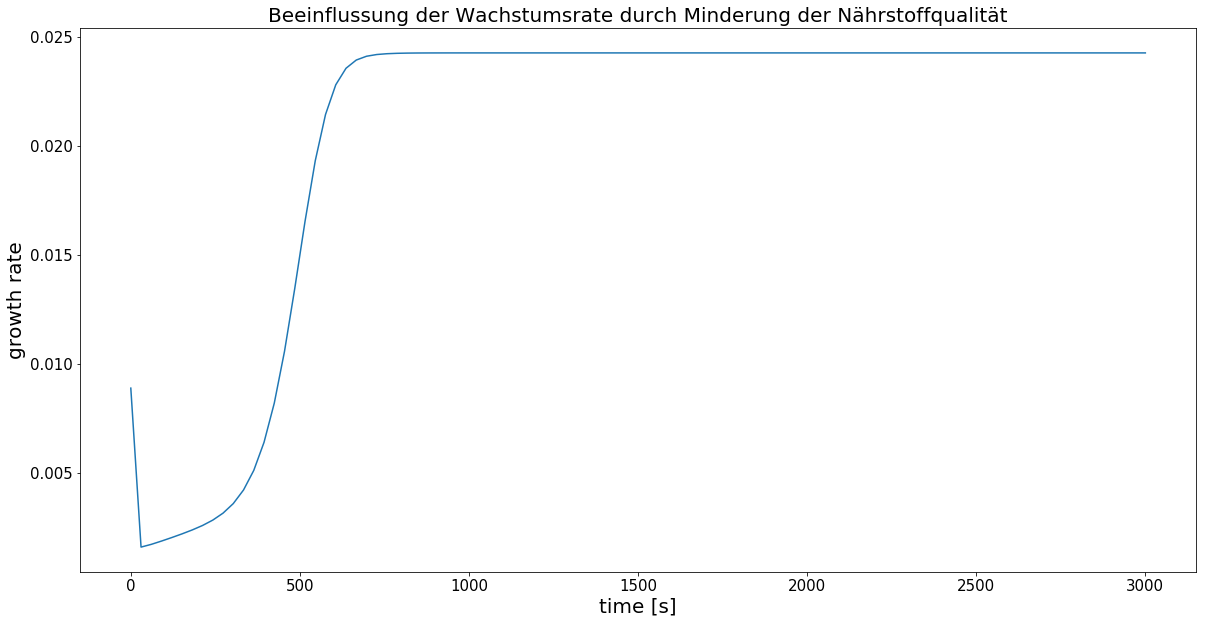

In [10]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.plot(s.getT(),s.getY()[:,16])

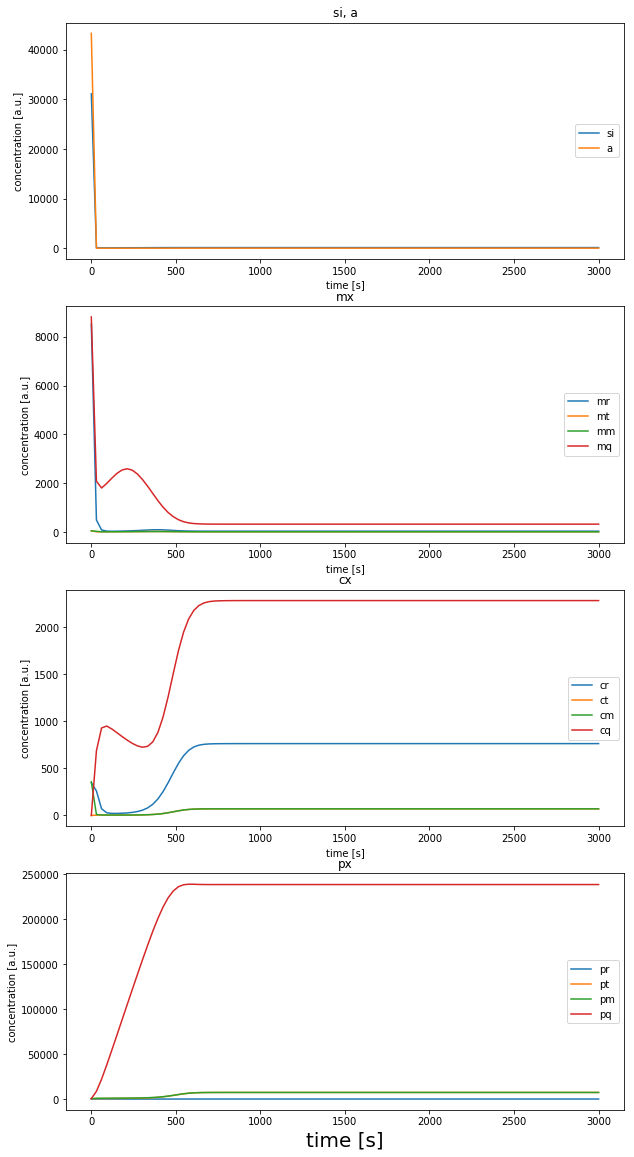

In [11]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(s.getT(),s.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(s.getT(),s.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(s.getT(),s.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')



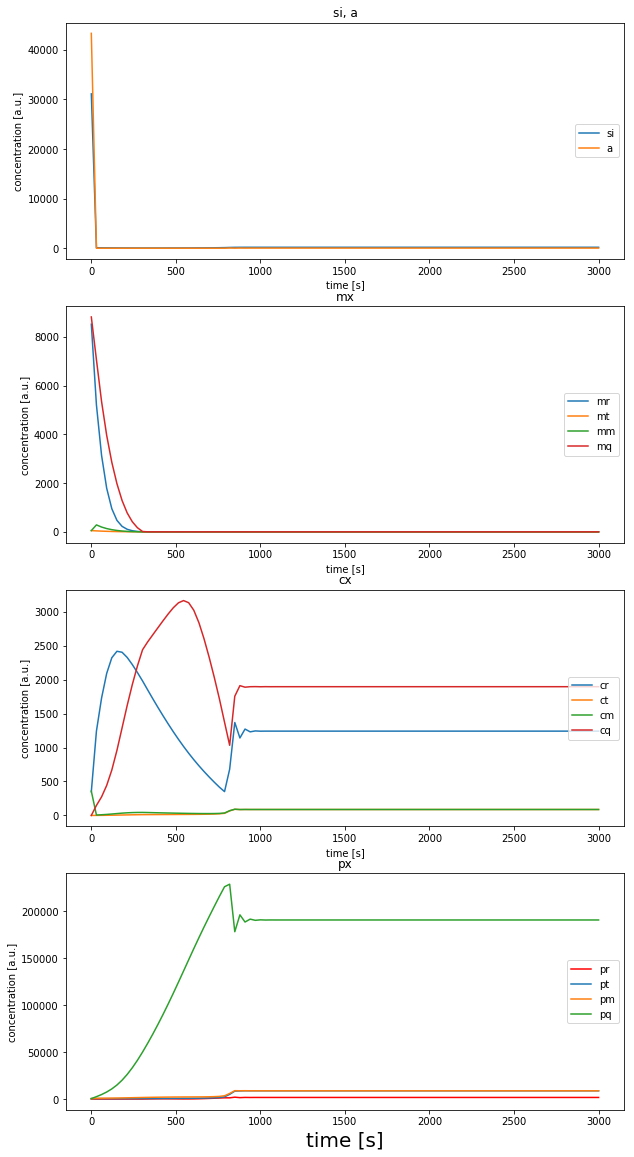

In [15]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[10:11]),'r-', label = cl[10])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')

In [14]:
mneu = WeisseBaseModel()

#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values_neu = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])


mneu.par.update({'dm':1.00000000e-02})
mneu.par.update({'Kgamma': 1.00000000e+00})
mneu.par.update({'vt':1.00000000e+03})
mneu.par.update({'Kt':9.80109874e+02})
mneu.par.update({'vm':5.80000000e+03})
mneu.par.update({'Km':1.00000000e+03})
mneu.par.update({'hq':1.00000000e+01})
mneu.par.update({'kb':1.00000000e+01})
mneu.par.update({'ku':1.00000000e-02})

sneu = modelbase.Simulator(mneu)
sneu.timeCourse(np.linspace(0,3000,100),weise_values_neu);



In [27]:
qtb_plot.set("notebook")

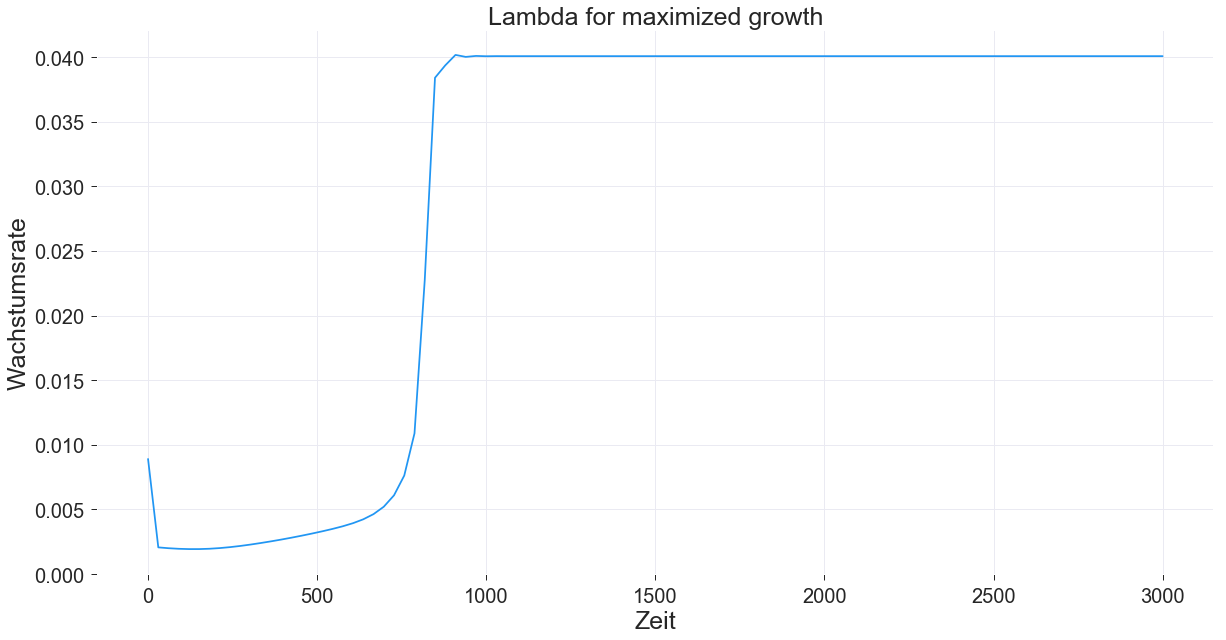

In [34]:
plt.figure(figsize=(20,10))
plt.plot(sneu.getT(),sneu.getY()[:,16])
plt.title('Lambda for maximized growth', size = 25)
plt.xlabel('Zeit', size=25)
plt.ylabel('Wachstumsrate', size=25)
plt.tick_params(**{'labelsize': 20})

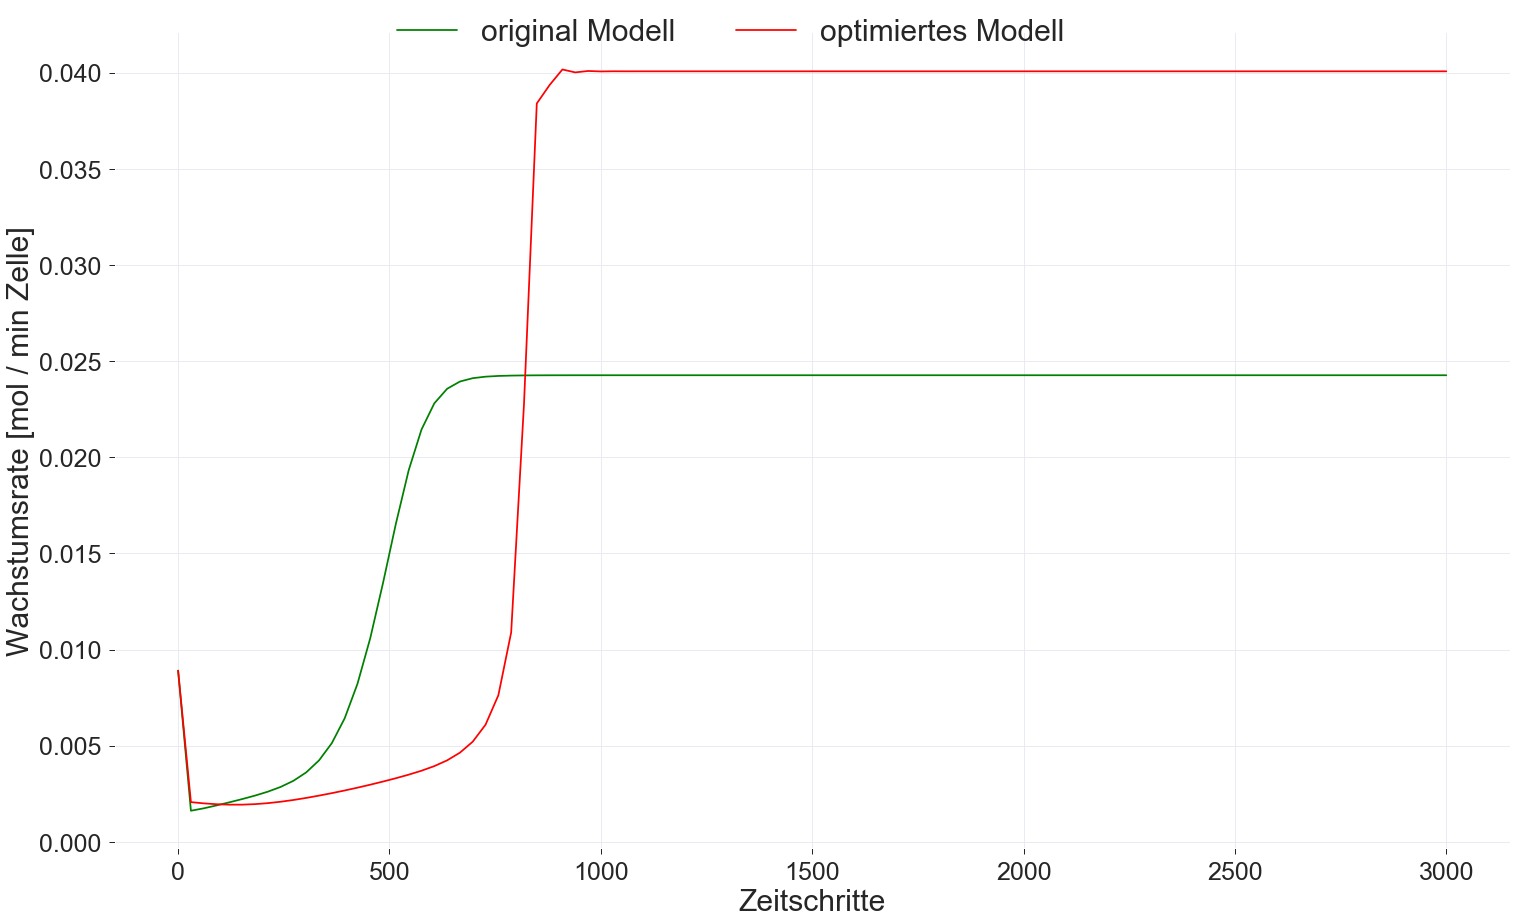

In [75]:
plt.figure(figsize=(25,15))
plt.plot(s.getT(),s.getY()[:,16],'g', label='original Modell')
plt.plot(sneu.getT(),sneu.getY()[:,16],'r', label='optimiertes Modell')
#plt.title('growth maximization', size=30)
plt.xlabel('Zeitschritte', size=30)
plt.ylabel('Wachstumsrate [mol / min Zelle]', size=30)
plt.legend(loc = 'center right',prop={'size': 30}, ncol=2, bbox_to_anchor=[0.7,1])
plt.tick_params(**{'labelsize': 25})

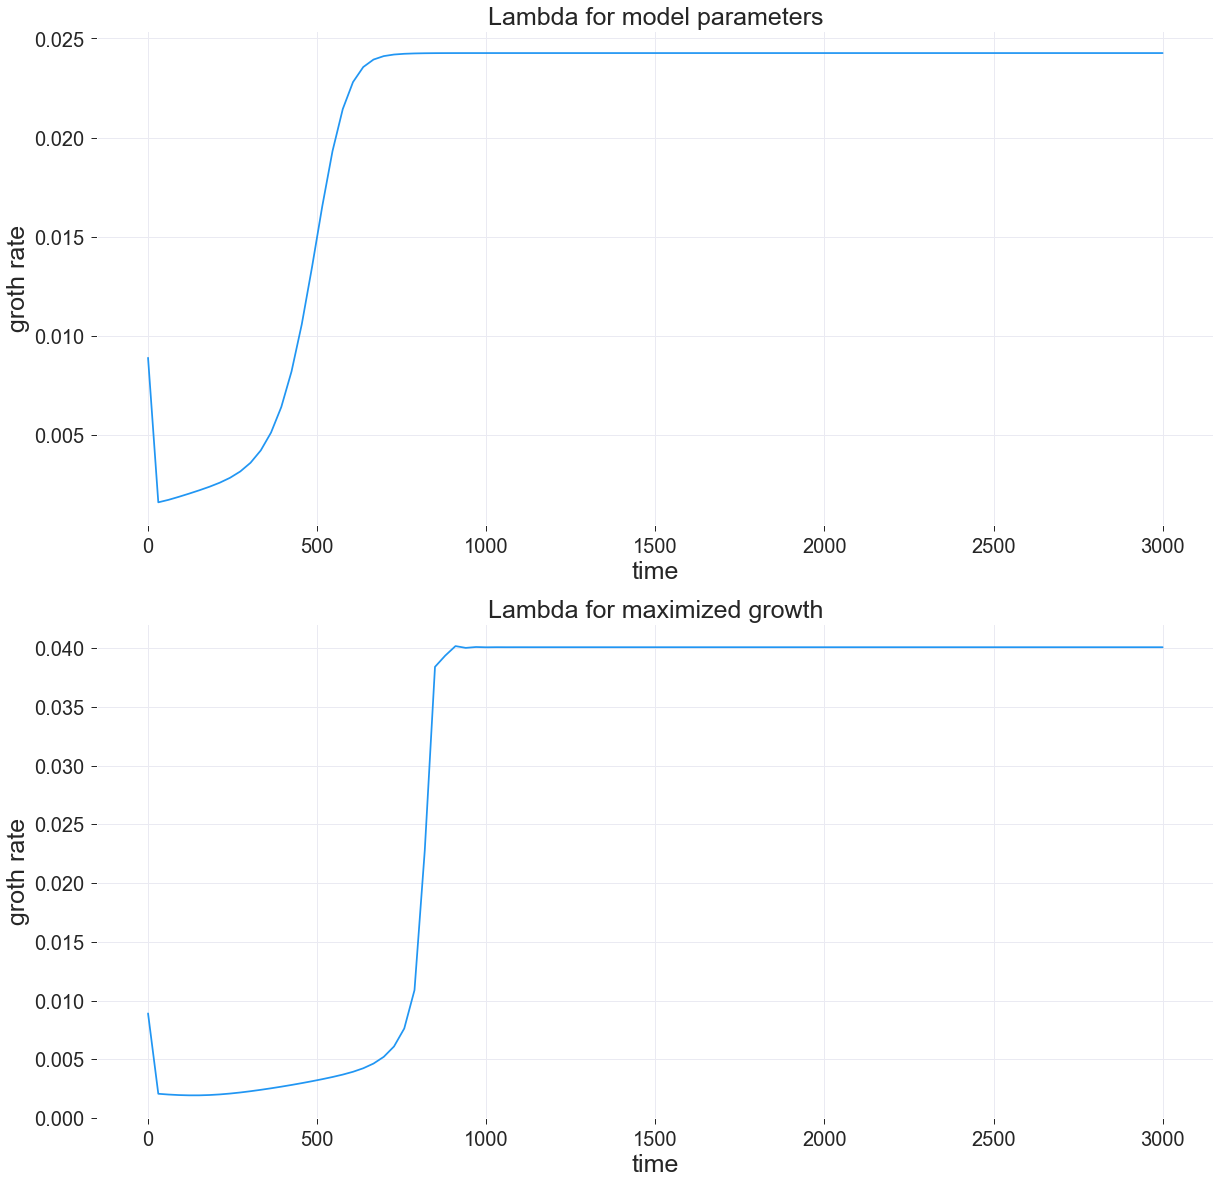

In [35]:
fig, Plotlist = plt.subplots(2,1,figsize=(20,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getY()[:,16])
Plotlist[0].set_title('Lambda for model parameters', size=25)
Plotlist[0].set_xlabel('time', size=25)
Plotlist[0].set_ylabel('groth rate', size=25)
Plotlist[0].tick_params(**{'labelsize': 20})


Plotlist[1].plot(sneu.getT(),sneu.getY()[:,16])
Plotlist[1].set_title('Lambda for maximized growth', size = 25)
Plotlist[1].set_xlabel('time', size=25)
Plotlist[1].set_ylabel('groth rate', size=25)
Plotlist[1].tick_params(**{'labelsize': 20})


(0, 1000)

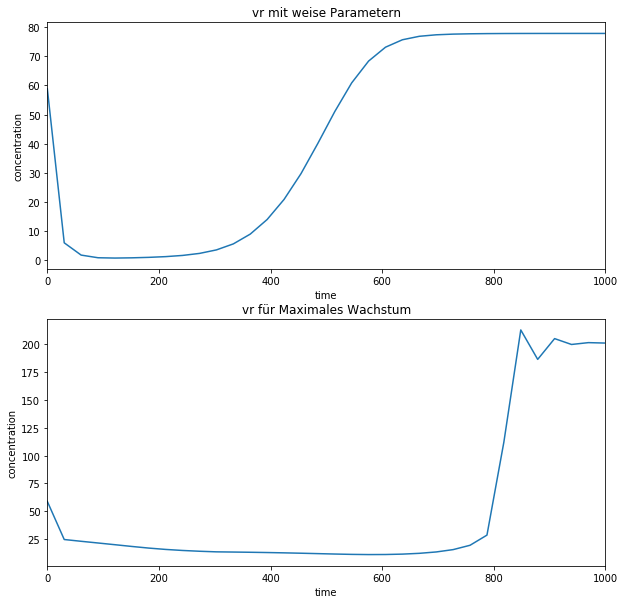

In [16]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[0].set_title('vr mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vr'))
Plotlist[1].set_title('vr für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


(0, 1000)

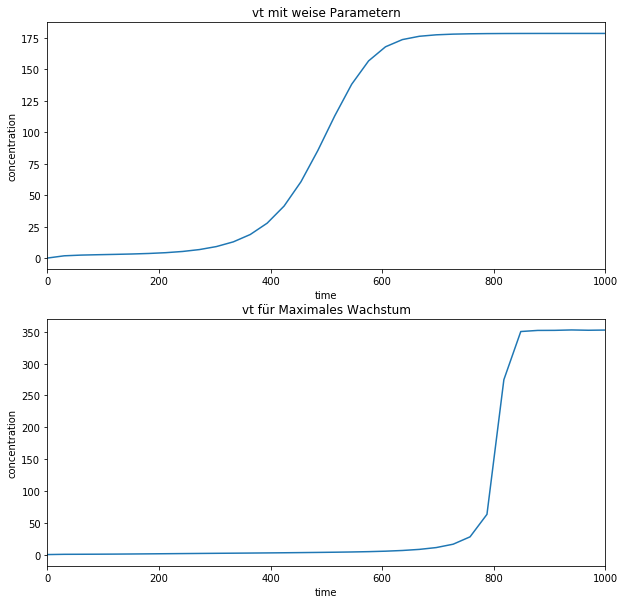

In [17]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vt'))
Plotlist[0].set_title('vt mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vt'))
Plotlist[1].set_title('vt für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

(0, 1000)

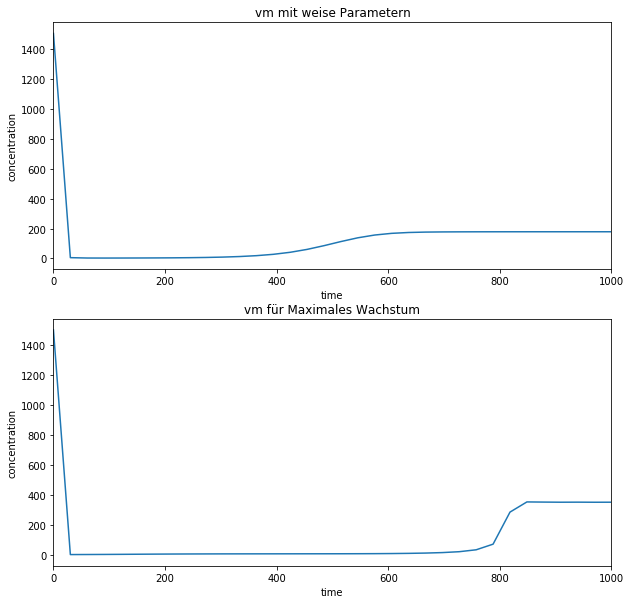

In [18]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

(0, 1000)

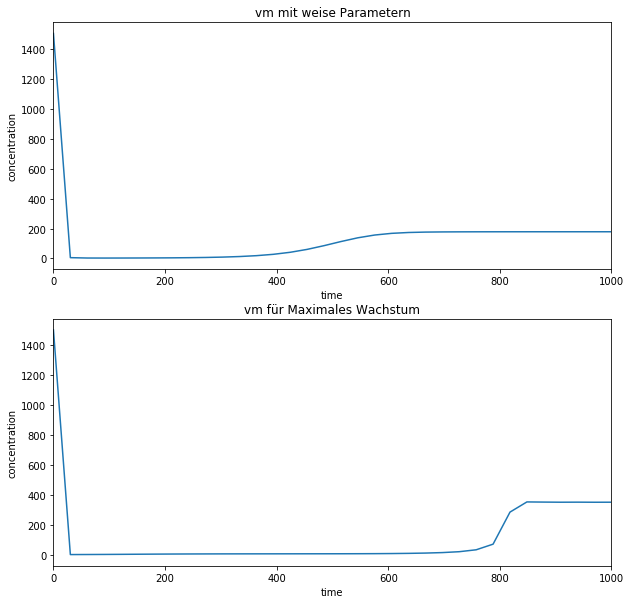

In [19]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

In [215]:
m.stoichiometries

{'vimp': {'si': 1},
 'vcat': {'si': -1, 'a': 0.5},
 'vr': {'a': -7459, 'pr': 2, 'mr': 1, 'cr': -1},
 'vt': {'a': -300, 'pr': 1, 'pt': 1, 'mt': 1, 'ct': -1},
 'vm': {'a': -300, 'pr': 1, 'pm': 1, 'mm': 1, 'cm': -1},
 'vq': {'a': -300, 'pr': 1, 'pq': 1, 'mq': 1, 'cq': -1},
 'cbur': {'pr': -1, 'mr': -1, 'cr': 1},
 'cbut': {'pr': -1, 'mt': -1, 'ct': 1},
 'cbum': {'pr': -1, 'mm': -1, 'cm': 1},
 'cbuq': {'pr': -1, 'mq': -1, 'cq': 1},
 'omegar': {'mr': 1},
 'degmr': {'mr': -1},
 'omegat': {'mt': 1},
 'degmt': {'mt': -1},
 'omegam': {'mm': 1},
 'degmm': {'mm': -1},
 'omegaq': {'mq': 1},
 'degmq': {'mq': -1},
 'dilution_si': {'si': -1},
 'dilution_a': {'a': -1},
 'dilution_mr': {'mr': -1},
 'dilution_mt': {'mt': -1},
 'dilution_mm': {'mm': -1},
 'dilution_mq': {'mq': -1},
 'dilution_cr': {'cr': -1},
 'dilution_ct': {'ct': -1},
 'dilution_cm': {'cm': -1},
 'dilution_cq': {'cq': -1},
 'dilution_pr': {'pr': -1},
 'dilution_pt': {'pt': -1},
 'dilution_pm': {'pm': -1},
 'dilution_pq': {'pq': -1}}